In [12]:
import os
from pathlib import Path
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout,Input, Add, ReLU, GlobalAveragePooling2D, MaxPooling2D

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

SEED = 15
IMAGE_SIZE = 64
BATCH_SIZE = 64

In [14]:
train_dir = Path('Cricketinshorts')
test_dir = Path('CricketTest')


In [15]:
pre_trained_model = InceptionV3(input_shape = (227, 227, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [16]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

model_4 = Model( pre_trained_model.input, x) 

model_4.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [5]:


Target_Size = (227,227)

# Generate Train Data
train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        batch_size=64,
        shuffle = True,
        subset='training',
        class_mode='categorical')

# Generate Validation data
val_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        shuffle = True,
        batch_size=64,
        subset='validation',
        class_mode='categorical')


labels = train_data.class_indices

classes = list(labels)

#X,y = next(iter(train_data))

Found 8674 images belonging to 5 classes.
Found 1528 images belonging to 5 classes.


In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  brightness_range = [0.2,1.0],
                                  validation_split = 0.15)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    subset='training',
                                                    class_mode='categorical',
                                                    target_size = (227, 227))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  train_datagen.flow_from_directory( train_dir,
                                                          batch_size  = 64,
                                                          subset='validation',
                                                          class_mode='categorical',
                                                          target_size = (227, 227))

Found 8674 images belonging to 5 classes.
Found 1528 images belonging to 5 classes.


In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',mode='max', patience = 5)
history = model_4.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 2,
            verbose = 2,
            callbacks=[callback])

Epoch 1/2


KeyboardInterrupt: 

In [6]:
#data_augmentation = tf.keras.Sequential([
  #layers.RandomZoom(height_factor = (0.1,0.3), width_factor= (0.1,0.3)),
  #layers.RandomTranslation(height_factor = 0.4, width_factor = 0.4),
#])

In [7]:
#data_augmentation = tf.keras.Sequential([
  #layers.experimental.preprocessing.RandomZoom(height_factor = (0.1,0.3), width_factor= (0.1,0.3)),
  #layers.experimental.preprocessing.RandomTranslation(height_factor = 0.4, width_factor = 0.4),
  
#])

In [8]:
#aug_ds = train_ds.map(
  #lambda x, y: (resize_and_rescale(x, training=True), y))

In [9]:
#train_data = train_data.map(
    #lambda X, y: (data_augmentation(X, training=True), y)
#).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
# Generate Test Data
test_list = tf.io.gfile.listdir('CricketTest/')
test_data = []
for f in test_list:
    img = tf.keras.preprocessing.image.load_img('CricketTest/' + f, color_mode = "rgb", target_size = Target_Size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_data.append(img)

In [11]:
from tensorflow.keras.layers import ZeroPadding2D

In [12]:
import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
#from resnets_utils import *
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow

#from test_utils import summary, comparator
#import public_tests

%matplotlib inline

In [14]:
model_4 = tf.keras.Sequential([
        base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(5, activation = 'softmax')
])

In [15]:
#model_4 = ResNet50(input_shape = (227, 227, 3), classes = 5)
print(model_4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
batch_normalization_203 (Bat (None, 5, 5, 1536)        10752     
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [ ]:
#model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_4.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',mode='max', patience = 5)
H = model_4.fit(train_data,validation_data=val_data,epochs = 2,verbose=1,callbacks= callback)

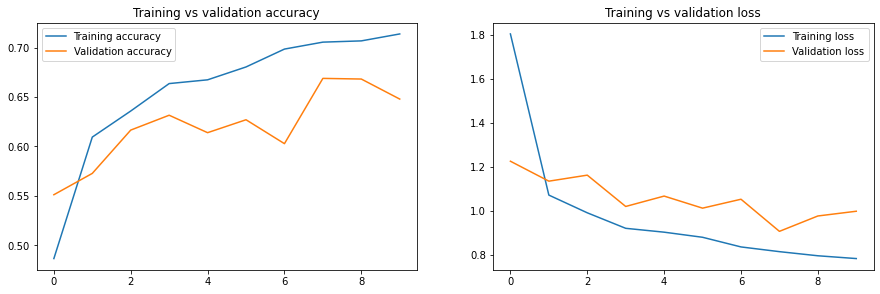

In [21]:
accuracy = H.history['accuracy']
val_accuracy  = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [29]:
pred_new = model_4.predict(tf.convert_to_tensor(test_data))
prednew = np.argmax(pred_new, axis = 1)
prednew

array([4, 4, 4, 4, 4, 3, 0, 0, 1, 1, 1, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 3,
       3, 1, 3, 0, 0, 1, 1, 3, 3, 1, 1, 1, 0, 3, 0, 3, 3, 3, 3, 3, 1, 0,
       0, 3, 0, 4, 3, 3, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 0, 3, 0, 0, 1, 1, 1, 3, 1, 1, 0, 0, 4, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 4,
       1, 1, 0, 0, 1, 3, 3, 3, 3, 3, 4, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 4,
       1, 3, 3, 3, 4, 4, 3, 3, 3, 3], dtype=int64)

In [30]:
#df = pd.read_csv('test_latest.csv')

In [1]:
#df['Class'] = prednew
#df

In [2]:
#df[df['Class']==0]

In [3]:
#df.to_csv('submit.csv', index=False)
#submit